## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#importing the necessary libraries
import pandas as pd

# importing the dataset
kingcounty_df = pd.read_csv("kc_house_data.csv")
kingcounty_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# DATA CLEANING

In [2]:
kingcounty_df.shape

(21597, 21)

In [3]:
kingcounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Six columns have their datatypes as strings while 15 are numeric. There is a date column which is among the six columns whose data type is an object. This will be converted to date object to facilitate feature engineering.  

Sqft_basement has its datatype as strings yet it should be numeric, therefore needs transformation. 
The grade column mixes two datatypes. The other three: Waterfront, view, and condition are correctly categorized.

## Dealing with missing data, duplicates and placeholders
Currently the following columns in the dataset contain missing data.
* Water front - 2376,
* view - 63
* yr_renovated - 3842

In [4]:
kingcounty_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Description of the Dataset
A quick sneak peak of some of the columns in our dataset reveals the following statistics:
- That the Average price of a house in King county is $540,296.6  with the maximum price being $ 7,700,000 and the minimum price being $78,000.The standard deviation of the price is $367,368.
- The average number of bedrooms of a house in King County is 3 bedrooms with the maximum number of bedrooms being 33 and the minimum being 1. The standard deviation is 0.93.
- For the number of bathrooms, the average number of bathrooms is 2. The house that has the highest number of bathrooms has 8 while the one that has the least has 0.5.  The standard deviation is 0.77.
- The average number of floors in house in King county is 1.49 with the highest having 3.5 floors and the lowest having 1 with a spread of 0.5


In [7]:
kingcounty_df.isna().mean() *100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

Analysis of the null values in the dataset reveals that:
* 11% of values in the waterfront column are null values
* 0.2% of values in the view column are null 
* 17* of the values in the Yr-renovated column are null

We drop all the rows  with the null values in three columns affected since they represent a small proportioni of the dataset. Filling the null values with mean o any other measure of central tendecy would be innacurate and would lead to bias in  our regresssion model

In [10]:
# droppin the rows missing data
kingcounty_df.dropna(inplace = True)

In [11]:
kingcounty_df.shape

(15762, 21)

### Duplicates

In [12]:
# checking for duplicates
duplicates = kingcounty_df[kingcounty_df.duplicated(
subset = "id")]
duplicates


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
837,8682262400,5/13/2015,419950.0,2,1.75,1350,4003,1.0,NO,NONE,...,8 Good,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,NO,NONE,...,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,7856400300,3/22/2015,1510000.0,2,2.50,3180,9400,2.0,NO,EXCELLENT,...,10 Very Good,2610,570.0,1985,0.0,98006,47.5617,-122.158,3760,9450
19537,643300040,3/13/2015,719521.0,4,1.75,1920,9500,1.0,NO,NONE,...,7 Average,1470,450.0,1966,0.0,98006,47.5683,-122.177,1820,10091
20038,8648900110,8/26/2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,...,8 Good,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260


In [14]:
# dropping the duplicated data
kingcounty_df.drop_duplicates(subset="id", keep="first", inplace=True)

In [15]:
kingcounty_df.shape

(15676, 21)

### placeholders

In [16]:
kingcounty_df.sample(n=12) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14607,8161000220,12/27/2014,350000.0,3,2.50,1860,21876,2.0,NO,NONE,...,8 Good,1860,0.0,1992,0.0,98014,47.6455,-121.901,2450,21876
4944,3421069120,2/19/2015,329999.0,3,2.75,3360,41250,1.0,NO,NONE,...,7 Average,1820,1540.0,1988,0.0,98022,47.2604,-122.023,2580,98881
20602,9828702336,2/20/2015,610000.0,2,2.00,1210,740,2.0,NO,NONE,...,8 Good,780,430.0,2014,0.0,98112,47.6206,-122.300,1480,1171
17274,5316100920,7/25/2014,2250000.0,3,4.25,5150,7800,2.5,NO,AVERAGE,...,11 Excellent,4170,980.0,1954,0.0,98112,47.6288,-122.282,4270,7800
20552,2768301482,8/21/2014,490000.0,3,2.25,1280,1520,2.0,NO,NONE,...,8 Good,1080,200.0,2008,0.0,98107,47.6651,-122.368,1280,1681
18021,8856970530,12/8/2014,326995.0,3,2.50,1860,5321,2.0,NO,NONE,...,7 Average,1860,0.0,2000,0.0,98038,47.3848,-122.033,1940,5205
6213,2421059090,5/11/2015,640000.0,4,2.50,4090,215186,2.0,NO,NONE,...,8 Good,3670,420.0,1979,0.0,98092,47.2964,-122.116,2430,142005
10899,7399300510,2/4/2015,294900.0,3,2.25,1500,8100,1.0,NO,NONE,...,7 Average,1210,290.0,1968,0.0,98055,47.4632,-122.190,1600,7896
17597,5095400760,6/23/2014,337000.0,3,1.75,1310,12750,1.0,NO,NONE,...,7 Average,1310,0.0,1993,0.0,98059,47.4695,-122.070,1790,13500
5086,1972202005,5/21/2014,475000.0,4,2.00,1790,2250,1.0,NO,AVERAGE,...,7 Average,840,950.0,1909,0.0,98103,47.6526,-122.345,1440,1545


In [17]:
# changing the sqft_basement column from categorical to numerical
kingcounty_df["sqft_basement"] = pd.to_numeric(kingcounty_df["sqft_basement"], errors='coerce')
kingcounty_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [18]:
# missing data that was originally in filled by symbols
kingcounty_df["sqft_basement"].isna().sum()

332

The sqft_basement is missing **332** data points

In [19]:
# Drop the missing data in the above column
kingcounty_df.dropna(inplace = True)

In [20]:
kingcounty_df.shape

(15344, 21)

Creating a **numerical** column to replace the **categorical** data

In [21]:
kingcounty_df["view"].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [22]:
# create a mapping dictionary
mapping_dict = {"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5,}

# map the ordinal column to the appropriate numerical values
kingcounty_df['view_num'] = kingcounty_df['view'].map(mapping_dict)

In [23]:
kingcounty_df.head()

# Map 'yes' to 1 and 'no' to 0
kingcounty_df["waterfront_num"] = kingcounty_df["waterfront"].map({'YES': 1, 'NO': 0})                                                

kingcounty_df.head(5)

kingcounty_df.dtypes


id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront         object
view               object
condition          object
grade              object
sqft_above          int64
sqft_basement     float64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
view_num            int64
waterfront_num      int64
dtype: object

In [33]:
kingcounty_df['date_column'] = pd.to_datetime(kingcounty_df['date'])
kingcounty_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_num,waterfront_num,date_column
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0,2014-12-09
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0,2014-12-09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0,2015-02-18
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,2001,0.0,98053,47.6561,-122.005,4760,101930,1,0,2014-05-12
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,1960,0.0,98146,47.5123,-122.337,1780,8113,1,0,2015-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,2008,0.0,98116,47.5773,-122.409,1330,1265,1,0,2015-02-19
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,1,0,2014-05-21
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,1,0,2015-02-23
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,1,0,2014-06-23


C:\Users\user\AppData\Local\Temp\ipykernel_15496\3787826831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kingcounty_df.corr(), center =0);


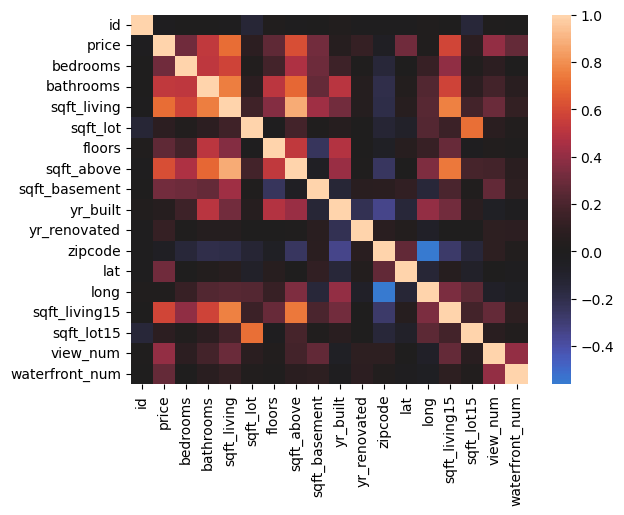

In [35]:
import seaborn as sns
sns.heatmap(kingcounty_df.corr(), center =0);

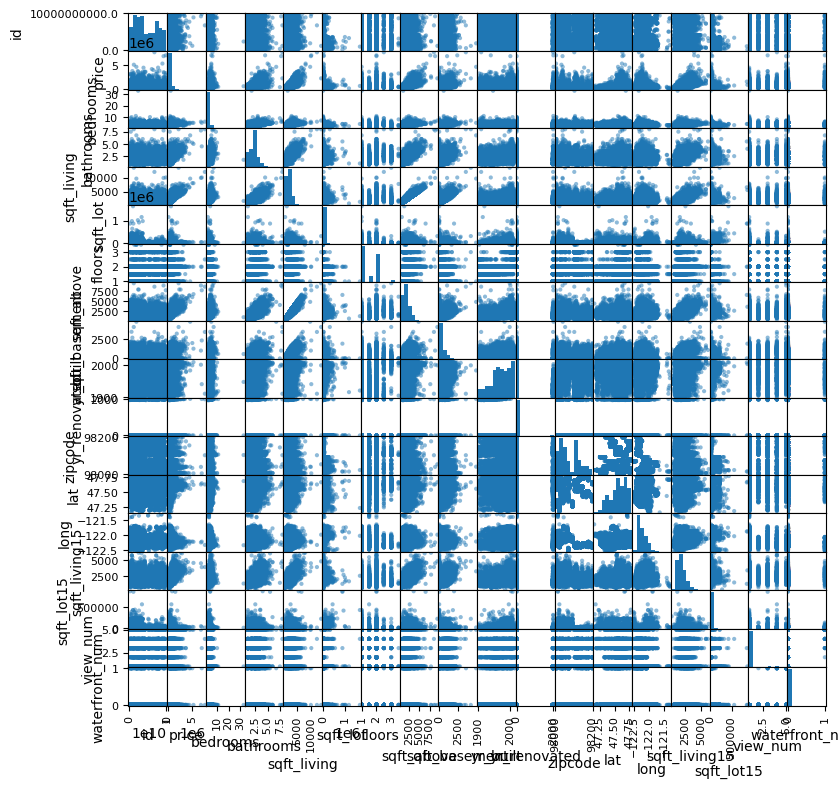

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(kingcounty_df,figsize  = [9, 9]);
plt.show()